In [38]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [39]:
drivers = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\drivers.csv')
driver_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\driver_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')

Drivers Data Cleaning

In [40]:
drivers.drop(columns=['url', 'dob', 'nationality'], inplace=True)

Races Data Cleaning

In [41]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

All 2022 Races

In [42]:
races = races[races['year'] == 2022]

Driver standings for only the races in 2022

In [43]:
driver_standings =  driver_standings[driver_standings['raceId'].isin(races['raceId'])]

replacing driver IDs with the names

In [44]:
driver_ids = driver_standings['driverId'].unique()

In [45]:
driver_ids

array([842, 830, 815, 807, 849, 846, 817, 848, 840, 854, 855,   4, 852,
       839, 822, 844, 832,   1, 847, 825,  20, 856], dtype=int64)

In [46]:
driver_names = drivers[drivers['driverId'].isin(driver_ids)].set_index('driverId')['code'].to_dict()

In [47]:
driver_standings['Name'] = driver_standings['driverId'].replace(driver_names)

Adding the race Name based on race id

In [48]:
race_names = races.set_index('raceId')['name'].to_dict()

In [49]:
driver_standings['Race Name'] = driver_standings['raceId'].replace(race_names)

In [50]:
driver_standings.reset_index(inplace=True)

In [51]:
driver_standings.sort_values(by='raceId')

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
19,33434,71380,1074,825,10.0,5,5,0,MAG,Bahrain Grand Prix
18,33433,71379,1074,847,12.0,4,4,0,RUS,Bahrain Grand Prix
17,33432,71378,1074,1,15.0,3,3,0,HAM,Bahrain Grand Prix
16,33431,71377,1074,832,18.0,2,2,0,SAI,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
380,33795,71695,1093,832,202.0,5,5,1,SAI,United States Grand Prix
399,33814,71714,1093,20,38.0,11,11,0,VET,United States Grand Prix
357,33772,71694,1093,844,267.0,2,2,3,LEC,United States Grand Prix
388,33803,71703,1093,855,6.0,18,18,0,ZHO,United States Grand Prix


In [52]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [53]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
396,33811,71711,1093,815,265.0,3,3,2,PER,United States Grand Prix
397,33812,71712,1093,830,391.0,1,1,13,VER,United States Grand Prix
398,33813,71713,1093,842,23.0,14,14,0,GAS,United States Grand Prix
399,33814,71714,1093,20,38.0,11,11,0,VET,United States Grand Prix


In [54]:
driver_standings['Team'] = driver_standings['Name'].replace(driver_teams)

In [55]:
grouped = driver_standings.groupby(['Team','raceId'])

In [56]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [57]:
driver_standings['Name']

0      GAS
1      VER
2      PER
3      HUL
4      LAT
      ... 
396    PER
397    VER
398    GAS
399    VET
400    DEV
Name: Name, Length: 401, dtype: object

In [75]:
fix_lec = driver_standings.loc[357]
driver_standings.drop(index = [357], inplace=True)
driver_standings=driver_standings.append(fix_lec, ignore_index=True)

In [76]:
driver_standings['Race Name'][-50:]

351        Singapore Grand Prix
352        Singapore Grand Prix
353        Singapore Grand Prix
354        Singapore Grand Prix
355        Singapore Grand Prix
356        Singapore Grand Prix
357         Japanese Grand Prix
358         Japanese Grand Prix
359         Japanese Grand Prix
360         Japanese Grand Prix
361         Japanese Grand Prix
362         Japanese Grand Prix
363         Japanese Grand Prix
364         Japanese Grand Prix
365         Japanese Grand Prix
366         Japanese Grand Prix
367         Japanese Grand Prix
368         Japanese Grand Prix
369         Japanese Grand Prix
370         Japanese Grand Prix
371         Japanese Grand Prix
372         Japanese Grand Prix
373         Japanese Grand Prix
374         Japanese Grand Prix
375         Japanese Grand Prix
376         Japanese Grand Prix
377         Japanese Grand Prix
378         Japanese Grand Prix
379    United States Grand Prix
380    United States Grand Prix
381    United States Grand Prix
382    U

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


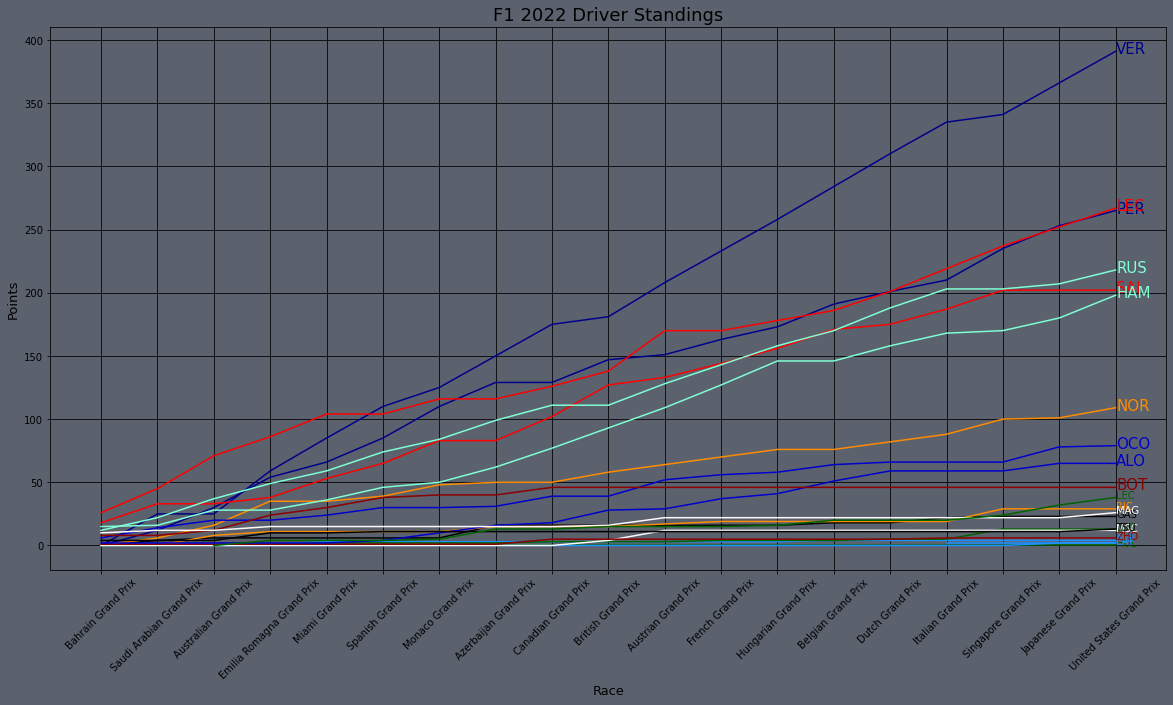

In [77]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkblue', 'darkblue', 'darkgreen', 'dodgerblue', 'darkorange','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','mediumblue','darkred','red','red','aquamarine','aquamarine','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings['Race Name'], driver_standings['points'],palette=colors,hue=driver_standings['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)
plt.legend().set_visible(False)
x = 0
for line, name in zip(ax.lines, driver_standings['Name']):
    y = line.get_ydata()[-1]
    if y <= 45:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=10, va="center")
    else:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=15, va="center")
    x+=1
    if x >= 21:
        break



plt.grid(color ='black')
plt.show()

In [59]:
last_most_race = driver_standings['raceId'].unique()[-1]

In [60]:
driverids = driver_standings[(driver_standings['raceId'] == last_most_race) & (driver_standings['points'] <= 35)]['driverId']

In [61]:
driver_standings2 = driver_standings[driver_standings['driverId'].isin(driverids)]

In [62]:
driver_standings2[driver_standings2['raceId'] == last_most_race]

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
358,33773,71693,1092,856,2.0,21,21,0,DEV,Japanese Grand Prix,dodgerblue
359,33774,71692,1092,20,32.0,11,11,0,VET,Japanese Grand Prix,darkgreen
360,33775,71691,1092,842,23.0,13,13,0,GAS,Japanese Grand Prix,gray
363,33778,71688,1092,807,0.0,22,22,0,HUL,Japanese Grand Prix,darkgreen
364,33779,71687,1092,849,2.0,20,20,0,LAT,Japanese Grand Prix,dodgerblue
366,33781,71685,1092,817,29.0,12,12,0,RIC,Japanese Grand Prix,darkorange
367,33782,71684,1092,848,4.0,19,19,0,ALB,Japanese Grand Prix,dodgerblue
371,33786,71676,1092,825,22.0,14,14,0,MAG,Japanese Grand Prix,snow
374,33789,71679,1092,852,11.0,17,17,0,TSU,Japanese Grand Prix,gray
376,33791,71681,1092,855,6.0,18,18,0,ZHO,Japanese Grand Prix,darkred


In [63]:
dev_add = {
    'driverStandingsId' : 00000,
    'raceId' : 1088,
    'driverId': 856,	
    'points':0,
    'position':22,
    'positionText' : '22',
    'wins' : 0,
    'Name'	: 'DEV', 
    'Race Name' : 'Dutch Grand Prix',
    'Team': 'dodgerblue'}

In [64]:
blank = pd.DataFrame(columns=driver_standings2.columns[0:])
blank.append(dev_add,ignore_index=True)

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,NaN,0,1088,856,0,22,22,0,DEV,Dutch Grand Prix,dodgerblue


In [65]:
driver_standings2 = blank.append(driver_standings2, ignore_index=True)

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


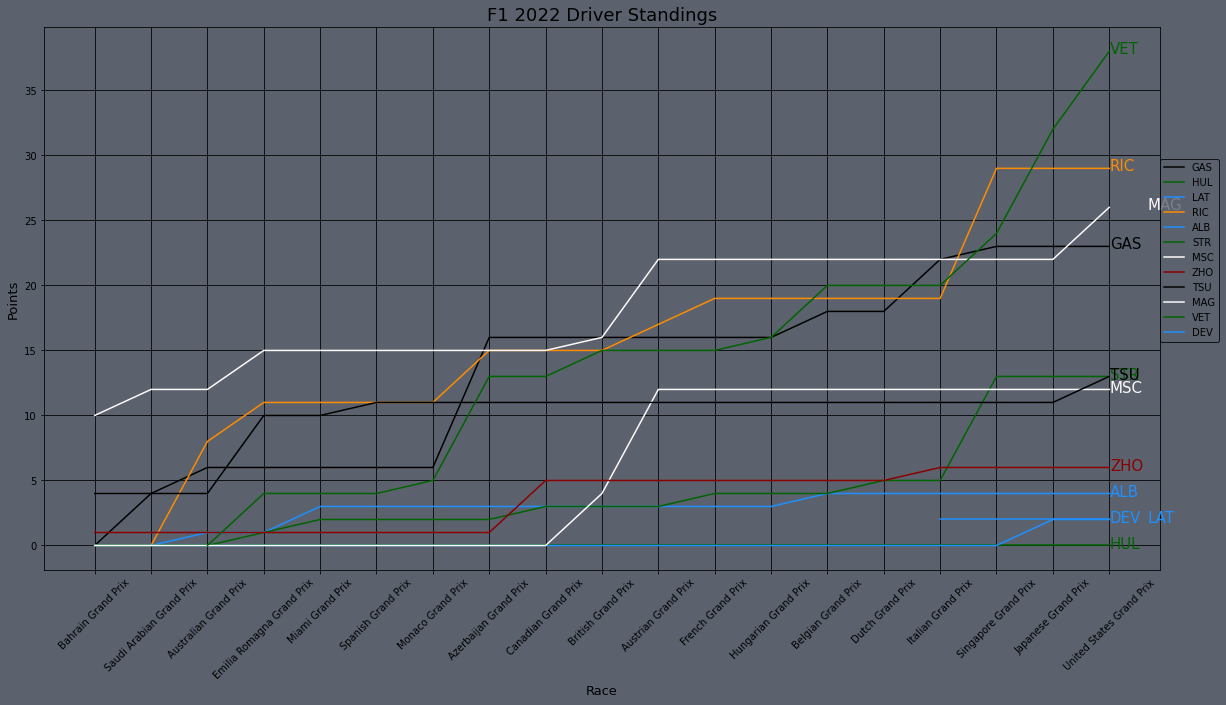

In [66]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkgreen', 'dodgerblue','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','black','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings2['Race Name'], driver_standings2['points'],palette=colors,hue=driver_standings2['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)




x = 0
for line, name in zip(ax.lines, driver_standings2['Name']):
    #print(name)
    if name=='MAG' and x >9:
        name='VET'

    if name=='TSU' and x >10:
        name='DEV'

    y = line.get_ydata()[-1]
    if name == 'LAT':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name == 'MAG':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name != 'LAT' and name != 'MAG':
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")

    x+=1
    if x >= 12:
        break

#plt.legend().set_visible(False)
plt.grid(color ='black')
plt.show()